In [ ]:
!ls

'IPL_Ball-by-Ball 2008-2020.csv'  'IPL_Matches 2008-2020.csv'   sample_data


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# Loading Data

In [ ]:
ballbyball_filepath = "IPL_Ball-by-Ball 2008-2020.csv"
matches_filepath = "IPL_Matches 2008-2020.csv"

# Dataframes 
ballplay = pd.read_csv(ballbyball_filepath)
matches = pd.read_csv(matches_filepath)

print(ballplay.shape, matches.shape)

(193468, 18) (816, 17)


In [ ]:
ballplay.head(10)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
5,335982,1,7,4,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
6,335982,1,7,5,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
7,335982,1,7,6,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
8,335982,1,8,1,BB McCullum,RT Ponting,JH Kallis,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
9,335982,1,8,2,BB McCullum,RT Ponting,JH Kallis,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
matches.head(10)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
5,335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,N,NaN,Aleem Dar,RB Tiffin
6,335988,Hyderabad,2008-04-22,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,N,NaN,IL Howell,AM Saheba
7,335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar
8,335990,Hyderabad,2008-04-24,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,N,NaN,Asad Rauf,MR Benson
9,335991,Chandigarh,2008-04-25,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,N,NaN,Aleem Dar,AM Saheba


In [ ]:
matches.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [ ]:
ballplay.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


# Data Preprocessing

In [ ]:
matches.isna().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [ ]:
ballplay.isna().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [ ]:
match_mean = matches.mean()
match_mean

id               756349.553922
neutral_venue         0.094363
result_margin        17.321652
dtype: float64

In [ ]:
matches = matches.fillna(match_mean)
matches.head(10)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
5,335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,N,NaN,Aleem Dar,RB Tiffin
6,335988,Hyderabad,2008-04-22,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,N,NaN,IL Howell,AM Saheba
7,335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar
8,335990,Hyderabad,2008-04-24,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,N,NaN,Asad Rauf,MR Benson
9,335991,Chandigarh,2008-04-25,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,N,NaN,Aleem Dar,AM Saheba


In [ ]:
matches = matches.replace({"city": {"Bangalore" : "Bengaluru"}, 
                           "team1": {"Delhi Daredevils" : "Delhi Capitals", "Deccan Chargers" : "Sunrisers Hyderabad", "Pune Warriors" : "Rising Pune Supergiants", "Rising Pune Supergiant" : "Rising Pune Supergiants"},
                           "team2": {"Delhi Daredevils" : "Delhi Capitals", "Deccan Chargers" : "Sunrisers Hyderabad", "Pune Warriors" : "Rising Pune Supergiants", "Rising Pune Supergiant" : "Rising Pune Supergiants"},
                           "toss_winner": {"Delhi Daredevils" : "Delhi Capitals", "Deccan Chargers" : "Sunrisers Hyderabad", "Pune Warriors" : "Rising Pune Supergiants", "Rising Pune Supergiant" : "Rising Pune Supergiants"},
                           "winner": {"Delhi Daredevils" : "Delhi Capitals", "Deccan Chargers" : "Sunrisers Hyderabad", "Pune Warriors" : "Rising Pune Supergiants", "Rising Pune Supergiant" : "Rising Pune Supergiants"}})

matches = matches.round(2)

matches.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bengaluru,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


# Exploratory Data Analysis

1. Most Wins

[120 106  99  95  91  88  86  81  27  13   6]


Text(0.5, 1.0, 'Most Wins in History of IPL')

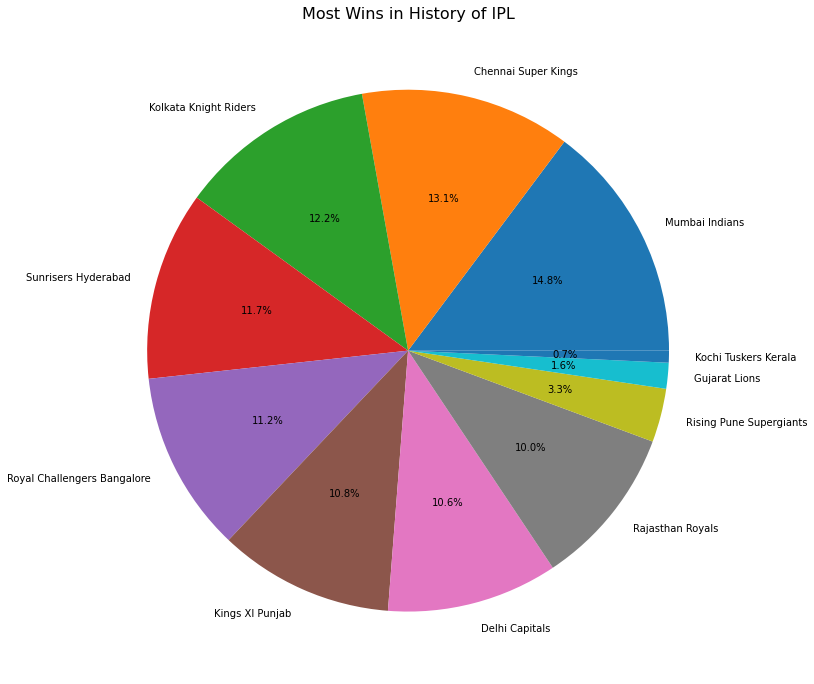

In [ ]:
temp = pd.DataFrame({'Winner':matches['winner']})
count_wins = temp.value_counts()
print(count_wins.values)
labels = [x[0] for x in count_wins.keys()]

bar,ax = plt.subplots(figsize=(20,12))
ax = plt.pie(x= count_wins,autopct="%.1f%%",labels=labels)
plt.title('Most Wins in History of IPL',fontsize=16)

2. Most Wins in Eliminator

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

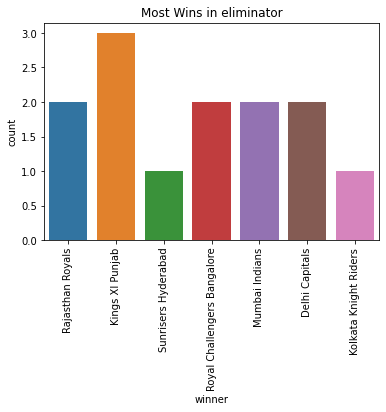

In [ ]:
sns.countplot(matches['winner'][matches['eliminator']=='Y'], data=matches)
plt.title('Most Wins in eliminator')
plt.xticks(rotation=90)

3. Toss Decisions

In [ ]:
teams = matches['toss_winner'].unique()
teams

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Mumbai Indians', 'Sunrisers Hyderabad',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Capitals',
       'Kochi Tuskers Kerala', 'Rising Pune Supergiants', 'Gujarat Lions'],
      dtype=object)

In [ ]:
decision_making = pd.DataFrame([],columns=['Toss Winner','Decision','Times'])

for id, element in enumerate(teams):
    temp_bat = matches[(matches['toss_winner']==element) & (matches['toss_decision']=='bat')]
    temp_field = matches[(matches['toss_winner']==element) & (matches['toss_decision']=='field')]
    decision_making = decision_making.append({'Toss Winner':element, 'Decision':'bat','Times':temp_bat['toss_winner'].count()}, ignore_index=True)
    decision_making = decision_making.append({'Toss Winner':element, 'Decision':'field', 'Times':temp_field['toss_winner'].count()}, ignore_index=True)

decision_making

,Toss Winner,Decision,Times
0,Royal Challengers Bangalore,bat,24
1,Royal Challengers Bangalore,field,63
2,Chennai Super Kings,bat,51
3,Chennai Super Kings,field,46
4,Rajasthan Royals,bat,34
5,Rajasthan Royals,field,53
6,Mumbai Indians,bat,48
7,Mumbai Indians,field,58
8,Sunrisers Hyderabad,bat,48
9,Sunrisers Hyderabad,field,52


Text(0.5, 1.0, 'Toss Decision per Team')

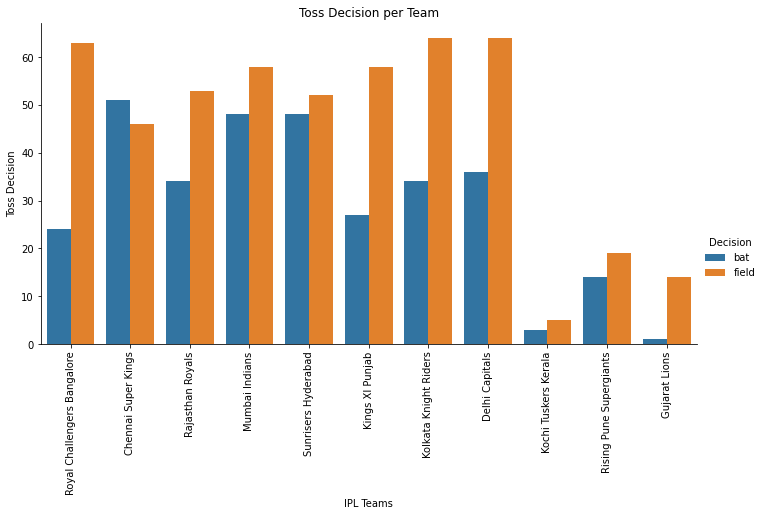

In [ ]:
sns.catplot(x='Toss Winner',y='Times',hue='Decision',data=decision_making, kind='bar', height=5, aspect=2)
plt.xticks(rotation=90)
plt.xlabel('IPL Teams')
plt.ylabel('Toss Decision')
plt.title('Toss Decision per Team')

4. Famous Venue

Text(0, 0.5, 'Venue')

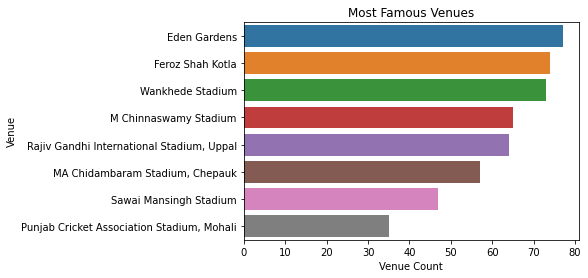

In [ ]:
sns.barplot(x = matches['venue'].value_counts().head(8).values, y=matches['venue'].value_counts().head(8).index , data = matches)
plt.title('Most Famous Venues')
plt.xlabel('Venue Count')
plt.ylabel('Venue')

5. Impact of Toss on Final Result

['Toss Wins Match losses', 'Toss Wins Match Wins']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



Text(0.5, 1.0, 'Impact of Toss Wins on Match Wins')

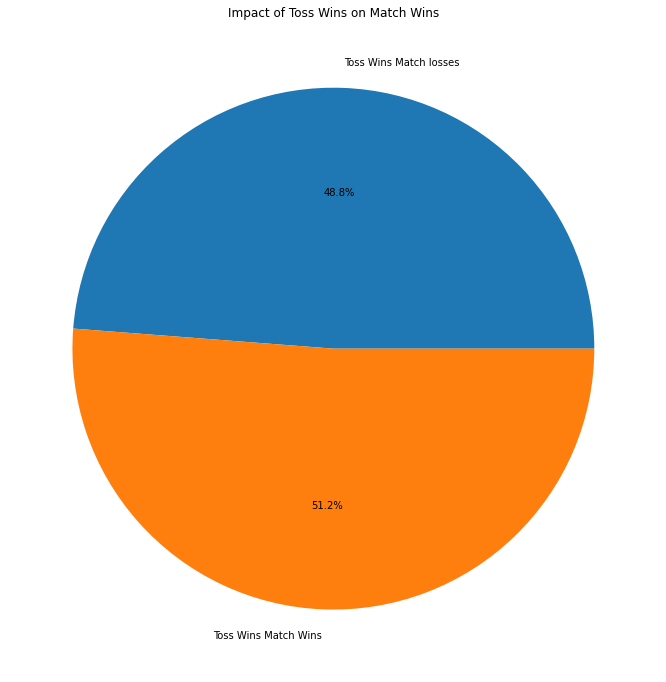

In [ ]:
toss_losses=0
toss_wins=0

for element in matches.values:
    toss_winner = element[8]
    match_winner = element[10]
    if toss_winner != match_winner:
        toss_losses+=1
    else:
        toss_wins+=1
result = pd.DataFrame({'Result':[toss_losses, toss_wins],'type':['Toss Wins Match losses','Toss Wins Match Wins']})
temp =  result.set_index('type')
bar,ax = plt.subplots(figsize=(20,12))
labels = [x for x in temp.index]
print(labels)
ax = plt.pie(x= temp,autopct="%.1f%%",labels=labels)
plt.title('Impact of Toss Wins on Match Wins') 

6. Most Man of Match 

In [ ]:
matches['year'] = [x[:4] for x in matches['date']]
years = matches.year.unique()
print(years)

['2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017'
 '2018' '2019' '2020']


In [ ]:
man_of_match = pd.DataFrame([],columns=['Year','Man of Match','Times'])

for id, year in enumerate(years):
    player_of_match = matches['player_of_match'][matches['year']==year]
    man_of_match.loc[id] = [year, player_of_match.value_counts().index[0], player_of_match.value_counts()[0]]

man_of_match

,Year,Man of Match,Times
0,2008,SE Marsh,5
1,2009,YK Pathan,3
2,2010,SR Tendulkar,4
3,2011,CH Gayle,6
4,2012,CH Gayle,5
5,2013,MEK Hussey,5
6,2014,GJ Maxwell,4
7,2015,DA Warner,4
8,2016,V Kohli,5
9,2017,NM Coulter-Nile,3


Text(0.5, 1.0, 'Most Man of Match Year-Wise (2008-2020)')

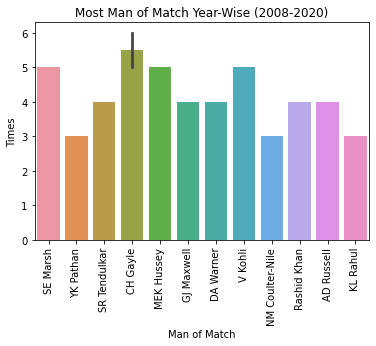

In [ ]:
sns.barplot(x='Man of Match',y = 'Times', data= man_of_match)
plt.xticks(rotation=90)
plt.title('Most Man of Match Year-Wise (2008-2020)')